<a href="https://colab.research.google.com/github/sandipmalii/CV-Learning/blob/main/Exp1Cc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gdown

Downloading...
From: https://drive.google.com/uc?id=1mwHYTkIf8n7te_7gl5LLxJ0o1nbY0sMk
To: /content/image.jpg
100%|██████████| 1.12M/1.12M [00:00<00:00, 84.8MB/s]


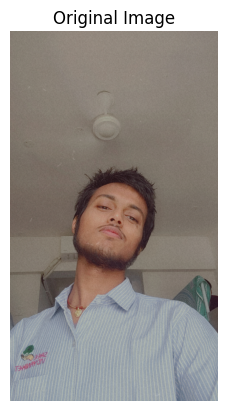

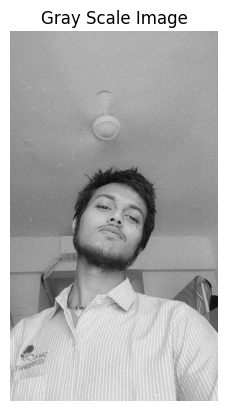

RGB values at (50, 50): (R: 137, G: 129, B: 118)


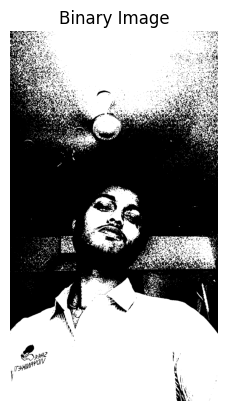

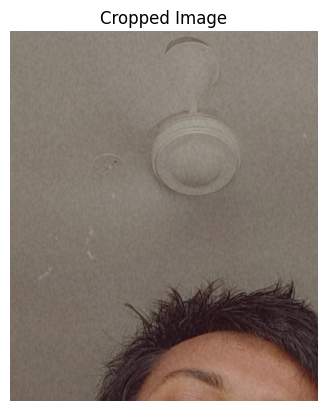

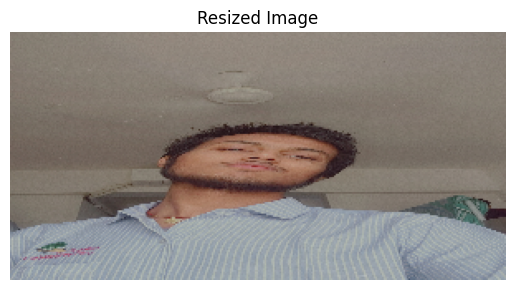

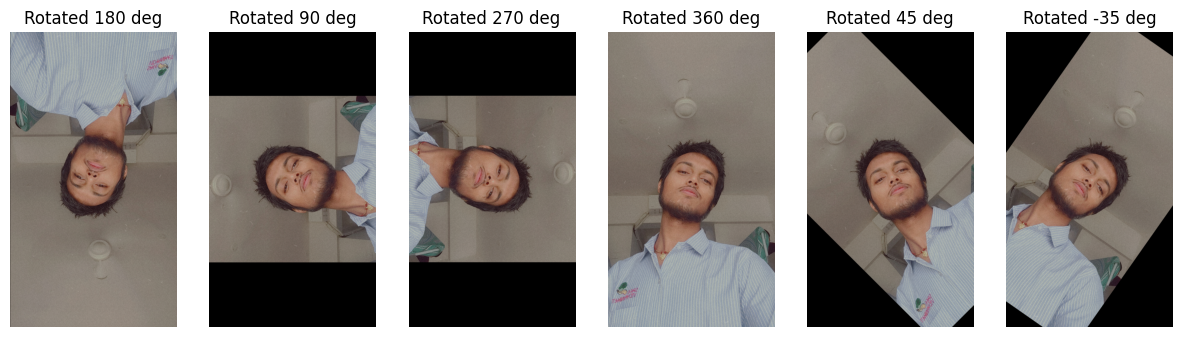

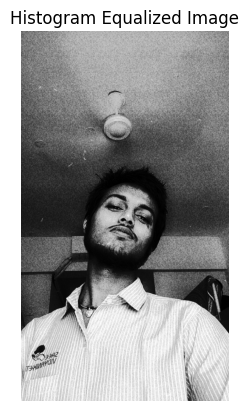

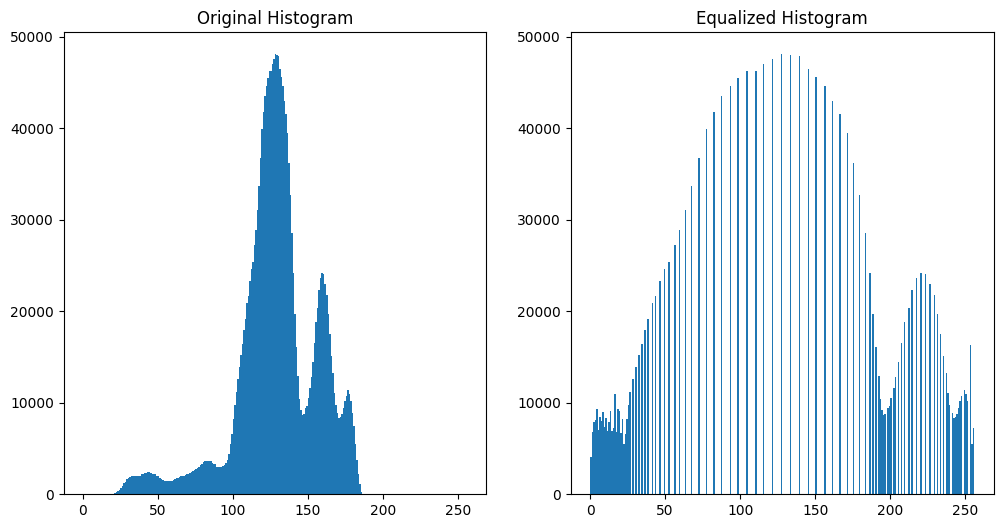

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import gdown

# Function to display images
def display_image(title, image, cmap=None):
    plt.imshow(image, cmap=cmap)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Function to download image from Google Drive
def download_image_from_gdrive(url, output):
    gdown.download(url, output, quiet=False)

# a. To read an image from Google Drive
file_url = 'https://drive.google.com/uc?id=1mwHYTkIf8n7te_7gl5LLxJ0o1nbY0sMk'
output_path = 'image.jpg'
download_image_from_gdrive(file_url, output_path)

# Load the image
image = cv2.imread(output_path)

# Check if the image is loaded properly
if image is None:
    print(f"Error: Unable to load image from {output_path}")
else:
    # b. To show an image
    display_image('Original Image', cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # c. Convert RGB to Gray Scale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    display_image('Gray Scale Image', gray_image, cmap='gray')

    # d. Read RGB values of a pixel
    x, y = 50, 50
    (b, g, r) = image[y, x]
    print(f'RGB values at ({x}, {y}): (R: {r}, G: {g}, B: {b})')

    # e. Convert Gray Scale to Binary
    _, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
    display_image('Binary Image', binary_image, cmap='gray')

    # f. Perform Image Crop
    cropped_image = image[300:900, 200:700]
    display_image('Cropped Image', cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

    # g. Perform Image Resize
    resized_image = cv2.resize(image, (300, 150))
    display_image('Resized Image', cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))

    # h. Rotation of an image
    def rotate_image(image, angle):
        center = (image.shape[1] // 2, image.shape[0] // 2)
        M = cv2.getRotationMatrix2D(center, angle, 1.0)
        return cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))

    # Angles to rotate
    angles = [180, 90, 270, 360, 45,-35]
    titles = ['180 deg', '90 deg', '270 deg', '360 deg', '45 deg', '-35 deg']

    # Create subplots
    fig, axs = plt.subplots(1, len(angles), figsize=(15, 5))
    for i, angle in enumerate(angles):
        rotated_image = rotate_image(image, angle)
        axs[i].imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
        axs[i].set_title(f'Rotated {titles[i]}')
        axs[i].axis('off')
    plt.show()

    # i. Histogram Equalization
    equalized_image = cv2.equalizeHist(gray_image)
    display_image('Histogram Equalized Image', equalized_image, cmap='gray')

    # Plotting the original and equalized histograms
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.hist(gray_image.ravel(), 256, [0, 256])
    plt.title('Original Histogram')
    plt.subplot(1, 2, 2)
    plt.hist(equalized_image.ravel(), 256, [0, 256])
    plt.title('Equalized Histogram')
    plt.show()
